In [87]:
gff_file = "/home/davide/Desktop/genomiChro/gffs/refseq/genomic.gff"
import pandas as pd
df=pd.read_csv(gff_file, sep="\t", comment="#", header=None)
df.columns = ["seqid", "source", "type", "start", "end", "score", "strand", "phase", "attributes"]
df=df[df["seqid"]=="NZ_CP083761.1"]
df_cds = df[df["type"]=="CDS"]
df

,seqid,source,type,start,end,score,strand,phase,attributes
0,NZ_CP083761.1,RefSeq,region,1,5716510,.,+,.,ID=NZ_CP083761.1:1..5716510;Dbxref=taxon:15589...
1,NZ_CP083761.1,RefSeq,gene,1,241,.,+,.,ID=gene-LAU37_RS00005;Name=LAU37_RS00005;gbkey...
2,NZ_CP083761.1,Protein Homology,CDS,1,241,.,+,1,ID=cds-WP_275983370.1;Parent=gene-LAU37_RS0000...
3,NZ_CP083761.1,RefSeq,gene,570,1055,.,-,.,ID=gene-LAU37_RS00010;Name=LAU37_RS00010;gbkey...
4,NZ_CP083761.1,GeneMarkS-2+,CDS,570,1055,.,-,0,ID=cds-WP_250123595.1;Parent=gene-LAU37_RS0001...
...,...,...,...,...,...,...,...,...,...
11219,NZ_CP083761.1,GeneMarkS-2+,CDS,5714129,5714266,.,+,0,ID=cds-WP_250123592.1;Parent=gene-LAU37_RS2756...
11220,NZ_CP083761.1,RefSeq,gene,5714516,5715055,.,+,.,ID=gene-LAU37_RS27565;Name=LAU37_RS27565;gbkey...
11221,NZ_CP083761.1,Protein Homology,CDS,5714516,5715055,.,+,0,ID=cds-WP_250123593.1;Parent=gene-LAU37_RS2756...
11222,NZ_CP083761.1,RefSeq,gene,5715635,5715874,.,+,.,ID=gene-LAU37_RS27570;Name=LAU37_RS27570;gbkey...


In [103]:
terminators.columns= ["start", "strand", "sequenza", "energia_libera","inCDS?", "fine_gene_precedente","distanza_codone_stop"]
terminators

,start,strand,sequenza,energia_libera,inCDS?,fine_gene_precedente,distanza_codone_stop
0,493,-,AAGGATTTGAACCCGCGCAGGCGGGTTTTGAGTATAA,-10.3,False,570,77
1,727,-,GACAACAACCGTGTTGCTGAGGCAGGAGTGGCGTTTTTTTATAAA,-4.8,True,12746,12019
2,5009,+,TGGGGTGCTGATGCTGTCATTGTTGGCAGTGcTTTTGTCAAACG,-8.2,True,4257,752
3,5779,-,CGCTTTGCTAATAGCGCCTGAGCTAAAGCGTTATTAATTTTGTGA,-4.8,False,12746,6967
4,9697,+,GAATACTGGCATCTGGGAACTGGCTCTCAGATATTTTTTCTGA,-7.8,True,8910,787
...,...,...,...,...,...,...,...
1970,5689989,-,ATTGCTTTGAGCGAGCTTTTAGAACCGGGCTTGTTAATTTTGTTT,-6.5,False,5689102,887
1971,5704071,-,GCATTTGACCACTCTGGCTGTAGGCAGTCAGGGcaTTTTTGTAACAA,-9.9,False,5689102,14969
1972,5706624,-,ATTGTTTGAGCGCATCGAACAGGTGCTTTTTGCCGATC,-6.4,False,5689102,17522
1973,5706751,-,TGTAGTTCTTCGGGGTCGATCCCTTTTCTCGCTTT,-4.0,False,5689102,17649


In [117]:
terminators.to_csv("/home/davide/Downloads/ARNold_stats.csv", sep="\t", index=False)

In [115]:
filtered_terminators = terminators[(terminators["distanza_codone_stop"] < 100) & ~(terminators["inCDS?"]) ]
filtered_terminators

,start,strand,sequenza,energia_libera,inCDS?,fine_gene_precedente,distanza_codone_stop
0,493,-,AAGGATTTGAACCCGCGCAGGCGGGTTTTGAGTATAA,-10.3,False,570,77
11,16265,-,CAGTGCATCTGCCCGGTTCAAACCGGGTTTTTTCATGTT,-10.2,False,16356,91
13,22383,+,CCTAGCCTTCTCCCCGCTCTTGTAGCGGGGcTTTTATTAAGTT,-12.6,False,22354,29
15,25407,-,TAACCAAAAAAGGCAGTAGCAATTAACGCTATTGCCTTTTAAACTAGG,-9.9,False,25468,61
16,25409,+,TAGTTTAAAAGGCAATAGCGTTAATTGCTACTGCCTTTTTTGGTTA...,-7.9,False,25384,25
...,...,...,...,...,...,...,...
1788,5101611,-,CCCCATCGAACCAGGTTGCAAATTGACCTGaTTTTACTAGCAA,-6.7,False,5101687,76
1803,5142066,-,TGCTGTCCGCGCTCGGCGCCCTTGCCCCGCTGGGaTTTCTTCTATCT,-8.5,False,5142153,87
1829,5218065,+,TTATAGATAATTTGTTTGTAAGGTAGTCTGCAAACAGTTTTATAATAAT,-5.2,False,5218004,61
1914,5493525,-,AGCGCTTGCTCGCTTGCATGGTGGAGATGTGAGCTTTTTATCCAAA,-9.1,False,5493560,35


In [118]:
filtered_terminators.to_csv("/home/davide/Downloads/ARNold_filtered.csv", sep="\t", index=False)

In [88]:
terminators= pd.read_csv("/home/davide/Downloads/ARNold_out.csv", sep="\t", header=None,skiprows=1)
#delete last column
terminators = terminators.drop(terminators.columns[4], axis=1)
terminators.columns = ["start", "strand", "sequence", "score"]
terminators

,start,strand,sequence,score
0,493,-,AAGGATTTGAACCCGCGCAGGCGGGTTTTGAGTATAA,-10.3
1,727,-,GACAACAACCGTGTTGCTGAGGCAGGAGTGGCGTTTTTTTATAAA,-4.8
2,5009,+,TGGGGTGCTGATGCTGTCATTGTTGGCAGTGcTTTTGTCAAACG,-8.2
3,5779,-,CGCTTTGCTAATAGCGCCTGAGCTAAAGCGTTATTAATTTTGTGA,-4.8
4,9697,+,GAATACTGGCATCTGGGAACTGGCTCTCAGATATTTTTTCTGA,-7.8
...,...,...,...,...
1970,5689989,-,ATTGCTTTGAGCGAGCTTTTAGAACCGGGCTTGTTAATTTTGTTT,-6.5
1971,5704071,-,GCATTTGACCACTCTGGCTGTAGGCAGTCAGGGcaTTTTTGTAACAA,-9.9
1972,5706624,-,ATTGTTTGAGCGCATCGAACAGGTGCTTTTTGCCGATC,-6.4
1973,5706751,-,TGTAGTTCTTCGGGGTCGATCCCTTTTCTCGCTTT,-4.0


In [89]:
# Extract all start, end positions and strand of CDS to a list of tuples
positions = df_cds[["start", "end", "strand"]].values.tolist()

def is_in_cds(row):
    start, strand = row['start'], row['strand']
    return any(start1 <= start <= end1 and strand1 == strand for start1, end1, strand1 in positions)

terminators['is_in_CDS'] = terminators.apply(is_in_cds, axis=1)

In [90]:
terminators

,start,strand,sequence,score,is_in_CDS
0,493,-,AAGGATTTGAACCCGCGCAGGCGGGTTTTGAGTATAA,-10.3,False
1,727,-,GACAACAACCGTGTTGCTGAGGCAGGAGTGGCGTTTTTTTATAAA,-4.8,True
2,5009,+,TGGGGTGCTGATGCTGTCATTGTTGGCAGTGcTTTTGTCAAACG,-8.2,True
3,5779,-,CGCTTTGCTAATAGCGCCTGAGCTAAAGCGTTATTAATTTTGTGA,-4.8,False
4,9697,+,GAATACTGGCATCTGGGAACTGGCTCTCAGATATTTTTTCTGA,-7.8,True
...,...,...,...,...,...
1970,5689989,-,ATTGCTTTGAGCGAGCTTTTAGAACCGGGCTTGTTAATTTTGTTT,-6.5,False
1971,5704071,-,GCATTTGACCACTCTGGCTGTAGGCAGTCAGGGcaTTTTTGTAACAA,-9.9,False
1972,5706624,-,ATTGTTTGAGCGCATCGAACAGGTGCTTTTTGCCGATC,-6.4,False
1973,5706751,-,TGTAGTTCTTCGGGGTCGATCCCTTTTCTCGCTTT,-4.0,False


In [92]:
cds_ends_plus = [end1 for start1, end1, strand1 in positions if strand1 == "+" ]
cds_ends_minus = [start1 for start1, end1, strand1 in positions if strand1 == "-" ]
def last_cds_end(row):
    start, strand = row['start'], row['strand']

    #find the last CDS end before the start of the terminator
    if strand == "+":
        if max(cds_ends_plus) < start:
            return max(cds_ends_plus)
        return max([end for end in cds_ends_plus if end <= start])
    else:
        if max(cds_ends_minus) < start:
            return max(cds_ends_minus)
        return min([end for end in cds_ends_minus if end >= start])

terminators['last_cds_end'] = terminators.apply(last_cds_end, axis=1)

In [93]:
terminators

,start,strand,sequence,score,is_in_CDS,last_cds_end
0,493,-,AAGGATTTGAACCCGCGCAGGCGGGTTTTGAGTATAA,-10.3,False,570
1,727,-,GACAACAACCGTGTTGCTGAGGCAGGAGTGGCGTTTTTTTATAAA,-4.8,True,12746
2,5009,+,TGGGGTGCTGATGCTGTCATTGTTGGCAGTGcTTTTGTCAAACG,-8.2,True,4257
3,5779,-,CGCTTTGCTAATAGCGCCTGAGCTAAAGCGTTATTAATTTTGTGA,-4.8,False,12746
4,9697,+,GAATACTGGCATCTGGGAACTGGCTCTCAGATATTTTTTCTGA,-7.8,True,8910
...,...,...,...,...,...,...
1970,5689989,-,ATTGCTTTGAGCGAGCTTTTAGAACCGGGCTTGTTAATTTTGTTT,-6.5,False,5689102
1971,5704071,-,GCATTTGACCACTCTGGCTGTAGGCAGTCAGGGcaTTTTTGTAACAA,-9.9,False,5689102
1972,5706624,-,ATTGTTTGAGCGCATCGAACAGGTGCTTTTTGCCGATC,-6.4,False,5689102
1973,5706751,-,TGTAGTTCTTCGGGGTCGATCCCTTTTCTCGCTTT,-4.0,False,5689102


In [94]:
#use abs
terminators['distanza_codone_stop'] = abs(terminators['start'] - terminators['last_cds_end'])

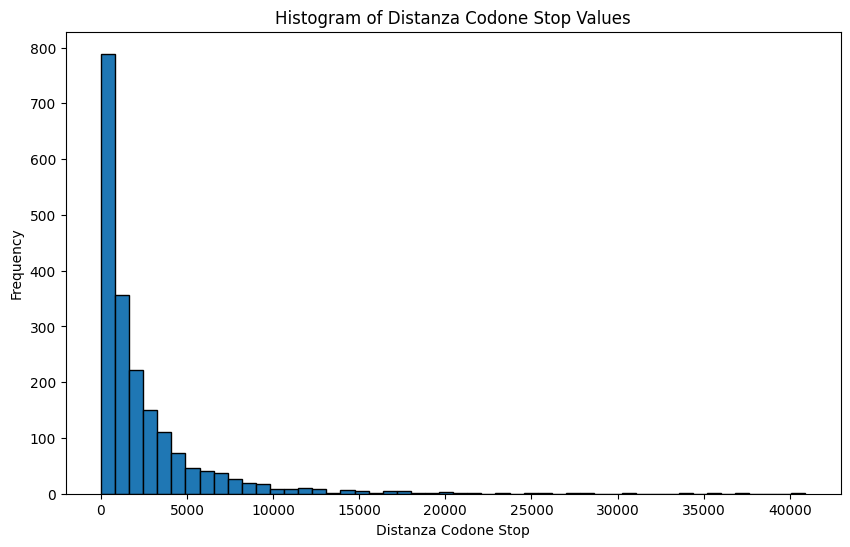

In [95]:
import matplotlib.pyplot as plt

# Assuming 'distanza_codone_stop' is the column in terminators DataFrame
distanza_values = terminators['distanza_codone_stop'].values.tolist()

plt.figure(figsize=(10,6))
plt.hist(distanza_values, bins=50, edgecolor='black')
plt.title('Histogram of Distanza Codone Stop Values')
plt.xlabel('Distanza Codone Stop')
plt.ylabel('Frequency')
plt.show()


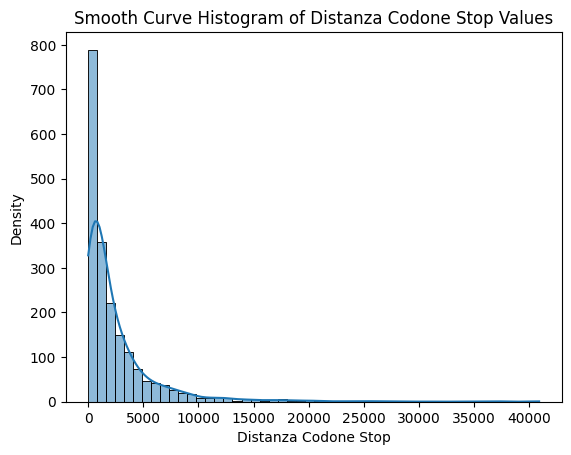

In [96]:
import seaborn as sns

# Assuming 'distanza_codone_stop' is the column in terminators DataFrame
distanza_values = terminators['distanza_codone_stop'].values

sns.histplot(distanza_values, kde = True, bins = 50)
plt.title('Smooth Curve Histogram of Distanza Codone Stop Values')
plt.xlabel('Distanza Codone Stop')
plt.ylabel('Density')
plt.show()

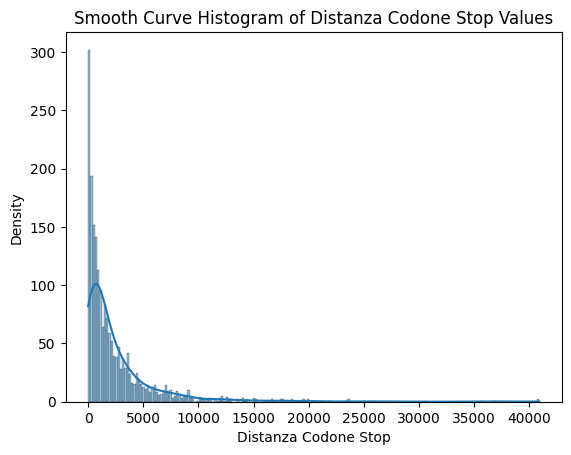

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'distanza_codone_stop' is the column in terminators DataFrame
distanza_values = terminators['distanza_codone_stop'].values

sns.histplot(distanza_values, kde = True, bins = 200)
plt.title('Smooth Curve Histogram of Distanza Codone Stop Values')
plt.xlabel('Distanza Codone Stop')
plt.ylabel('Density')

plt.show()

In [98]:
terminators=terminators

In [99]:
#filter terminators with distanza_codone_stop < 100
terminators_filtered = terminators[terminators['distanza_codone_stop'] < 100]
terminators_filtered

,start,strand,sequence,score,is_in_CDS,last_cds_end,distanza_codone_stop
0,493,-,AAGGATTTGAACCCGCGCAGGCGGGTTTTGAGTATAA,-10.3,False,570,77
11,16265,-,CAGTGCATCTGCCCGGTTCAAACCGGGTTTTTTCATGTT,-10.2,False,16356,91
13,22383,+,CCTAGCCTTCTCCCCGCTCTTGTAGCGGGGcTTTTATTAAGTT,-12.6,False,22354,29
15,25407,-,TAACCAAAAAAGGCAGTAGCAATTAACGCTATTGCCTTTTAAACTAGG,-9.9,False,25468,61
16,25409,+,TAGTTTAAAAGGCAATAGCGTTAATTGCTACTGCCTTTTTTGGTTA...,-7.9,False,25384,25
...,...,...,...,...,...,...,...
1810,5156397,+,CGTTAGCATCTGTAGGGTGGGCAATGTCCACCCTACaTTTTTGTTAAGT,-13.1,True,5156390,7
1829,5218065,+,TTATAGATAATTTGTTTGTAAGGTAGTCTGCAAACAGTTTTATAATAAT,-5.2,False,5218004,61
1914,5493525,-,AGCGCTTGCTCGCTTGCATGGTGGAGATGTGAGCTTTTTATCCAAA,-9.1,False,5493560,35
1923,5521479,-,ACGTAAATAGCTACGGATGTTGTTAATCATCTGTGTTTGATTTCTGG,-8.7,False,5521536,57


In [100]:
terminators_filtered['distanza_codone_stop'].describe()
#plot
import seaborn as sns
import matplotlib.pyplot as plt


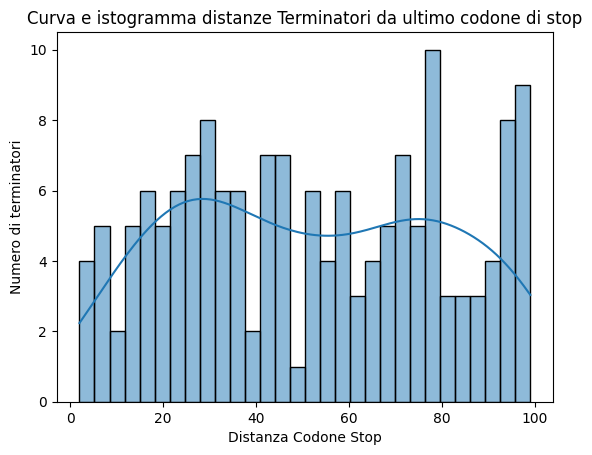

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'distanza_codone_stop' is the column in terminators_filtered DataFrame
distanza_values_filtered = filtered_terminators['distanza_codone_stop'].values

sns.histplot(distanza_values_filtered, kde = True, bins = 30)
plt.title('Curva e istogramma distanze Terminatori da ultimo codone di stop')
plt.xlabel('Distanza Codone Stop')
plt.ylabel('Numero di terminatori')
plt.show()